In [19]:
from astropy.io import fits
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb, SqrtStretch,ZScaleInterval
import numpy as np
from matplotlib.patches import Rectangle


In [11]:
morphology_path = 'E:/galaxyzoo_morph/train/'

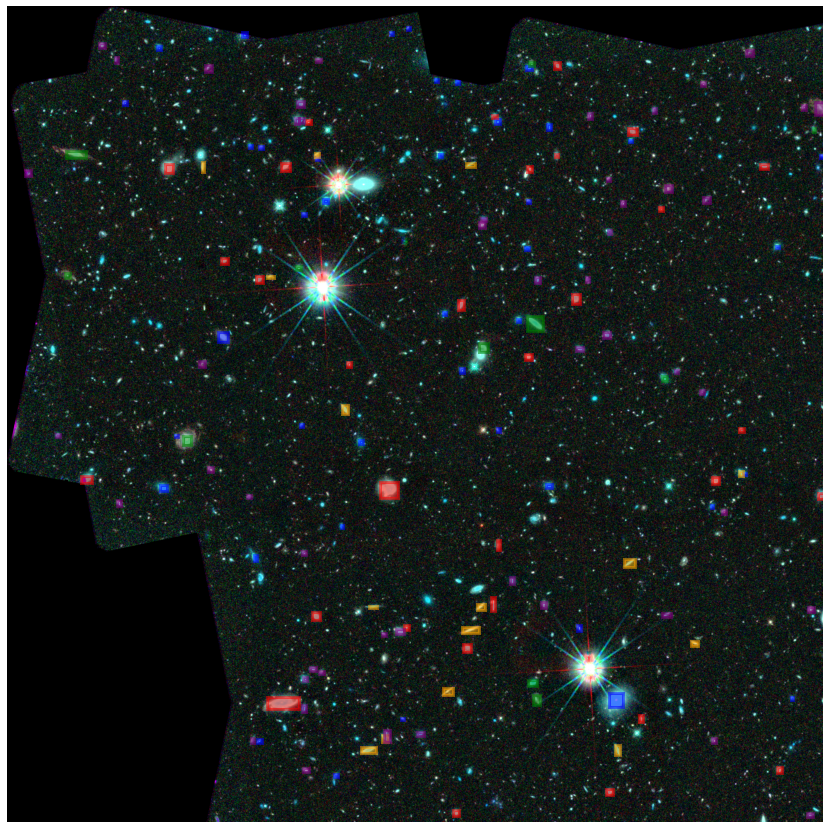

In [38]:
image_files = glob.glob(morphology_path+'*.fits')


image1 = fits.open(image_files[0])
data_f606 = image1[0].data
data_f125 = image1[2].data
data_f160 = image1[3].data


label_file = image_files[0].split('.')[0]+'_sources.json'
labels = pd.read_json(label_file)

ellipticals = labels[labels.obj_type == 'elliptical'].copy()
spirals = labels[labels.obj_type == 'spiral'].copy()
edgeon = labels[labels.obj_type == 'edge-on'].copy()
irregulars = labels[labels.obj_type == 'irregular'].copy()
barredspirals = labels[labels.obj_type == 'barred-spiral'].copy()



stretch = SqrtStretch()+ZScaleInterval()

data_f606 = stretch(data_f606)
data_f125 = stretch(data_f125)
data_f160 = stretch(data_f160)


low_value, high_value = np.percentile(np.hstack((data_f606.flatten(), data_f125.flatten(), data_f160.flatten())), (0.5, 99.5))
stretch_value = high_value - low_value


three_color = make_lupton_rgb(data_f606, data_f125, data_f160, stretch=high_value, Q=0, minimum=low_value)

fig,ax = plt.subplots(figsize=(15,15))
ax.imshow(three_color)
ax.axis('off')

for index,row in ellipticals.iterrows():
    ax.add_patch(Rectangle((row.bbox_min_col, row.bbox_min_row), row.bbox_width, row.bbox_height, color='b', alpha=0.5, ec='b', lw=3))

for index,row in spirals.iterrows():
    ax.add_patch(Rectangle((row.bbox_min_col, row.bbox_min_row), row.bbox_width, row.bbox_height, color='r', alpha=0.5, ec='r', lw=3))

for index,row in edgeon.iterrows():
    ax.add_patch(Rectangle((row.bbox_min_col, row.bbox_min_row), row.bbox_width, row.bbox_height, color='orange', alpha=0.5, ec='orange', lw=3))

for index,row in barredspirals.iterrows():
        ax.add_patch(Rectangle((row.bbox_min_col, row.bbox_min_row), row.bbox_width, row.bbox_height, color='green', alpha=0.5, ec='green', lw=3))

for index,row in irregulars.iterrows():
        ax.add_patch(Rectangle((row.bbox_min_col, row.bbox_min_row), row.bbox_width, row.bbox_height, color='purple', alpha=0.5, ec='purple', lw=3))


#plt.xlim(1000,3000)
#plt.ylim(2000,4000)
#plt.savefig('gz_morphology_example.jpg',bbox_inches='tight')
#plt.close()

plt.show()


In [ ]:
print (len(labels))